In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re

In [2]:
matplotlib.rcParams.update({'font.size': 11})

## Linearity

In [3]:
df1 = pd.read_csv(r'..\Final_data\Linearity\rectangular_filleted_linearity_displacement.csv', skiprows = 8)
df1.rename(columns = {'% X': 'X (mm)', 'Y': 'Y (mm)', 'Z': 'Z (mm)'}, inplace = True)
df1 = df1.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df1.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df1.reset_index(drop = True, inplace = True)
df1

X (mm)  Y (mm)  Z (mm)  w (mm) @ F1=0.1  w (mm) @ F1=0.2  \
0          0.0     0.0     0.0    -3.609922e-22    -7.219844e-22   
1          0.0     0.0     0.1     0.000000e+00     0.000000e+00   
2          0.0     0.0     0.2     0.000000e+00     0.000000e+00   
3          0.0     0.0     0.3     0.000000e+00     0.000000e+00   
4          0.0     0.0     0.4     0.000000e+00     0.000000e+00   
...        ...     ...     ...              ...              ...   
170555    41.5     4.0     0.5    -2.149792e-01    -4.299584e-01   
170556    41.5     4.0     0.6    -2.149756e-01    -4.299512e-01   
170557    41.5     4.0     0.7    -2.149725e-01    -4.299449e-01   
170558    41.5     4.0     0.8    -2.149698e-01    -4.299396e-01   
170559    41.5     4.0     0.9    -2.149679e-01    -4.299357e-01   

        w (mm) @ F1=0.3  w (mm) @ F1=0.4  w (mm) @ F1=0.5  w (mm) @ F1=0.6  \
0         -1.082977e-21    -1.443969e-21    -1.804961e-21    -2.165953e-21   
1          0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
2          0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
3          0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
4          0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
...                 ...              ...              ...              ...   
170555    -6.449375e-01    -8.599167e-01    -1.074896e+00    -1.289875e+00   
170556    -6.449267e-01    -8.599023e-01    -1.074878e+00    -1.289853e+00   
170557    -6.449174e-01    -8.598898e-01    -1.074862e+00    -1.289835e+00   
170558    -6.449095e-01    -8.598793e-01    -1.074849e+00    -1.289819e+00   
170559    -6.449036e-01    -8.598714e-01    -1.074839e+00    -1.289807e+00   

        w (mm) @ F1=0.7  ...  w (mm) @ F1=1.1  w (mm) @ F1=1.2  \
0         -2.526945e-21  ...    -3.970914e-21    -4.331906e-21   
1          0.000000e+00  ...     0.000000e+00     0.000000e+00   
2          0.000000e+00  ...     0.000000e+00     0.000000e+00   
3          0.000000e+00  ...     0.000000e+00     0.000000e+00   
4          0.000000e+00  ...     0.000000e+00     0.000000e+00   
...                 ...  ...              ...              ...   
170555    -1.504854e+00  ...    -2.364771e+00    -2.579750e+00   
170556    -1.504829e+00  ...    -2.364731e+00    -2.579707e+00   
170557    -1.504807e+00  ...    -2.364697e+00    -2.579669e+00   
170558    -1.504789e+00  ...    -2.364668e+00    -2.579638e+00   
170559    -1.504775e+00  ...    -2.364646e+00    -2.579614e+00   

        w (mm) @ F1=1.3  w (mm) @ F1=1.4  w (mm) @ F1=1.5  w (mm) @ F1=1.6  \
0         -4.692898e-21    -5.053891e-21    -5.414883e-21    -5.775875e-21   
1          0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
2          0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
3          0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
4          0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
...                 ...              ...              ...              ...   
170555    -2.794729e+00    -3.009709e+00    -3.224688e+00    -3.439667e+00   
170556    -2.794682e+00    -3.009658e+00    -3.224634e+00    -3.439609e+00   
170557    -2.794642e+00    -3.009614e+00    -3.224587e+00    -3.439559e+00   
170558    -2.794608e+00    -3.009578e+00    -3.224547e+00    -3.439517e+00   
170559    -2.794582e+00    -3.009550e+00    -3.224518e+00    -3.439486e+00   

        w (mm) @ F1=1.7  w (mm) @ F1=1.8  w (mm) @ F1=1.9  w (mm) @ F1=2  
0         -6.136867e-21    -6.497859e-21    -6.858851e-21  -7.219844e-21  
1          0.000000e+00     0.000000e+00     0.000000e+00   0.000000e+00  
2          0.000000e+00     0.000000e+00     0.000000e+00   0.000000e+00  
3          0.000000e+00     0.000000e+00     0.000000e+00   0.000000e+00  
4          0.000000e+00     0.000000e+00     0.000000e+00   0.000000e+00  
...                 ...              ...              ...            ...  

In [4]:
df2 = pd.read_csv(r'..\Final_data\Linearity\rectangular_filleted_linearity_stress.csv', skiprows = 4)
df2.rename(columns = {'% Applied force (N)': 'Applied force (N)'}, inplace = True)
df2 = df2.round({'Applied force (N)': 1})
df2

Applied force (N)  Max von Mises stress (N/m^2)
0                 0.1                  1.745461e+07
1                 0.2                  3.490923e+07
2                 0.3                  5.236384e+07
3                 0.4                  6.981845e+07
4                 0.5                  8.727307e+07
5                 0.6                  1.047277e+08
6                 0.7                  1.221823e+08
7                 0.8                  1.396369e+08
8                 0.9                  1.570915e+08
9                 1.0                  1.745461e+08
10                1.1                  1.920008e+08
11                1.2                  2.094554e+08
12                1.3                  2.269100e+08
13                1.4                  2.443646e+08
14                1.5                  2.618192e+08
15                1.6                  2.792738e+08
16                1.7                  2.967284e+08
17                1.8                  3.141830e+08
18                1.9                  3.316377e+08
19                2.0                  3.490923e+08

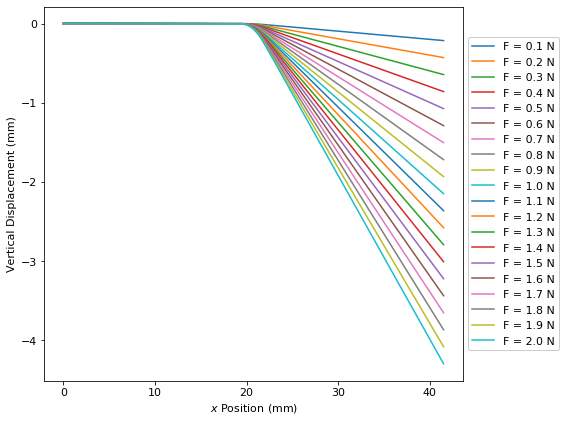

In [5]:
n = df1.shape[1] - 3
gradient = np.zeros(n)
pivot = np.zeros(n)

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
for i in range(n):
    colname = df1.columns[i+3]
    f = float(re.findall(r'F1=(\d\.?\d?)', colname)[0])
    df_process = df1[['X (mm)', 'Y (mm)', 'Z (mm)', colname]].copy()
    df_process = df_process[df_process['Z (mm)'] <= 0.8]
    df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
    df_process = df_process.groupby(['X (mm)']).mean()
    df_process.reset_index(inplace = True)
    coe = np.polyfit(df_process[df_process['X (mm)'] >= 21.5]['X (mm)'], df_process[df_process['X (mm)'] >= 21.5][colname], 1)
    gradient[i] = np.abs(coe[0])
    pivot[i] = -coe[1] / coe[0]
    ax.plot(df_process['X (mm)'], df_process[colname], '-', label = 'F = {:.1f} N'.format(f))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1, framealpha = 1)

plt.tight_layout()
plt.show()

In [6]:
df2['X rotation pivot (mm)'] = pivot
df2['Torque (Nm)'] = df2['Applied force (N)'] * (41.5 - pivot) * 0.001
df2['Deflection angle (°)'] = np.arctan(gradient) * 180.0 / np.pi
df2

Applied force (N)  Max von Mises stress (N/m^2)  X rotation pivot (mm)  \
0                 0.1                  1.745461e+07              20.699917   
1                 0.2                  3.490923e+07              20.699917   
2                 0.3                  5.236384e+07              20.699917   
3                 0.4                  6.981845e+07              20.699917   
4                 0.5                  8.727307e+07              20.699917   
5                 0.6                  1.047277e+08              20.699917   
6                 0.7                  1.221823e+08              20.699917   
7                 0.8                  1.396369e+08              20.699917   
8                 0.9                  1.570915e+08              20.699917   
9                 1.0                  1.745461e+08              20.699917   
10                1.1                  1.920008e+08              20.699917   
11                1.2                  2.094554e+08              20.699917   
12                1.3                  2.269100e+08              20.699917   
13                1.4                  2.443646e+08              20.699917   
14                1.5                  2.618192e+08              20.699917   
15                1.6                  2.792738e+08              20.699917   
16                1.7                  2.967284e+08              20.699917   
17                1.8                  3.141830e+08              20.699917   
18                1.9                  3.316377e+08              20.699917   
19                2.0                  3.490923e+08              20.699917   

    Torque (Nm)  Deflection angle (°)  
0       0.00208              0.592020  
1       0.00416              1.183913  
2       0.00624              1.775554  
3       0.00832              2.366817  
4       0.01040              2.957575  
5       0.01248              3.547705  
6       0.01456              4.137082  
7       0.01664              4.725583  
8       0.01872              5.313087  
9       0.02080              5.899473  
10      0.02288              6.484620  
11      0.02496              7.068413  
12      0.02704              7.650734  
13      0.02912              8.231470  
14      0.03120              8.810507  
15      0.03328              9.387737  
16      0.03536              9.963049  
17      0.03744             10.536340  
18      0.03952             11.107505  
19      0.04160             11.676442

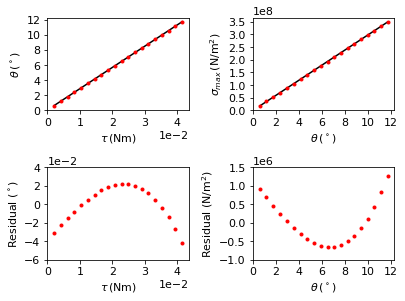

In [7]:
fig = plt.figure(figsize = (5.76, 4.32))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223, sharex = ax1)
ax4 = plt.subplot(224, sharex = ax2)

deflection_angle_coe = np.polyfit(df2['Torque (Nm)'], df2['Deflection angle (°)'], 1)
max_von_mises_stress_coe = np.polyfit(df2['Deflection angle (°)'], df2['Max von Mises stress (N/m^2)'], 1)
deflection_angle_fit = np.poly1d(deflection_angle_coe)
max_von_mises_stress_fit = np.poly1d(max_von_mises_stress_coe)
deflection_angle_residual = df2['Deflection angle (°)'] - deflection_angle_fit(df2['Torque (Nm)'])
max_von_mises_stress_residual = df2['Max von Mises stress (N/m^2)'] - max_von_mises_stress_fit(df2['Deflection angle (°)'])

ax1.plot(df2['Torque (Nm)'], deflection_angle_fit(df2['Torque (Nm)']), 'k-')
ax2.plot(df2['Deflection angle (°)'], max_von_mises_stress_fit(df2['Deflection angle (°)']), 'k-')
ax1.plot(df2['Torque (Nm)'], df2['Deflection angle (°)'], 'r.')
ax2.plot(df2['Deflection angle (°)'], df2['Max von Mises stress (N/m^2)'], 'r.')
ax3.plot(df2['Torque (Nm)'], deflection_angle_residual, 'r.')
ax4.plot(df2['Deflection angle (°)'], max_von_mises_stress_residual, 'r.')

ax1.ticklabel_format(scilimits = (0, 0), axis = 'x')
ax3.ticklabel_format(scilimits = (0, 0), axis = 'x')
ax2.ticklabel_format(scilimits = (0, 0), axis = 'y')
ax3.ticklabel_format(scilimits = (0, 0), axis = 'y')
ax4.ticklabel_format(scilimits = (0, 0), axis = 'y')

ax1.set_xlabel(r'${\tau}\/({\mathregular{Nm}})$')
ax2.set_xlabel(r'${\theta}\/(^\circ)$')
ax3.set_xlabel(r'${\tau}\/({\mathregular{Nm}})$')
ax4.set_xlabel(r'${\theta}\/(^\circ)$')
ax1.set_ylabel(r'${\theta}\/(^\circ)$')
ax2.set_ylabel(r'${\sigma_{max}}\/({\mathregular{N}}/{\mathregular{m}^2})$')
ax3.set_ylabel(r'Residual $(^\circ)$')
ax4.set_ylabel(r'Residual $({\mathregular{N}}/{\mathregular{m}^2})$')

ax1.set_xlim(left = 0)
ax2.set_xlim(left = 0)
ax3.set_xlim(left = 0)
ax4.set_xlim(left = 0)
ax1.set_ylim(bottom = 0)
ax2.set_ylim(bottom = 0)
ax1.set_xticks(0.01*np.arange(0, 5, 1))
ax2.set_xticks(np.arange(0, 14, 2))
ax3.set_xticks(0.01*np.arange(0, 5, 1))
ax4.set_xticks(np.arange(0, 14, 2))
ax1.set_yticks(np.arange(0, 14, 2))
ax2.set_yticks(10**7*np.arange(0, 40, 5))
ax3.set_yticks(10**-2*np.arange(-6, 6, 2))
ax4.set_yticks(10**5*np.arange(-10, 20, 5))

plt.tight_layout()
plt.savefig('rectangular_filleted_linearity.pdf')
plt.show()